# Principal Component Analysis

In [1]:
# Librerías necesarias para manipulación de datos
import pandas as pd
from pathlib import Path

# Librerías de scikit learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Preparación de los Datos

In [2]:
# Importa los datos en un DataFrame de Pandas
file_path = Path("../datos/breast_cancer.csv")  # Define la ruta del fichero de datos

# Crea un DataFrame con los datos del fichero de datos
data_raw = pd.read_csv(file_path, index_col=0)

# Muestra un ejemplo de los datos cargados
data_raw.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN


In [3]:
# Muestra el tamaño del DataFrame con los datos originales
data_raw.shape

(569, 32)

In [4]:
# Verificar si hay valores nulos
total_nan = data_raw.isna().sum().sum()

print(f"Número total de valores nulos: {total_nan}")

Número total de valores nulos: 569


In [5]:
# Eliminar las columnas donde al menos un elemento es NaN
data_clean = data_raw.dropna(axis=1, how="any")

In [6]:
# Muestra el tamaño del DataFrame con los datos limpios
data_clean.shape

(569, 31)

In [7]:
# Verificar los tipos de datos
data_clean.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
# Elimina la columna "diagnosis" ya que representa la predicción del diagnóstico, y además, es una variable no numérica
data_clean = data_clean.drop("diagnosis", axis=1)

# Muestra un ejemplo de los datos limpios
data_clean.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720


In [9]:
# Estandarización de los datos
scaler = StandardScaler() # Crea una instancia de StandardScaler

# Estandariza los datos utilizando la instancia de StandarScaler
data_standardized = scaler.fit_transform(data_clean)

# Muestra los datos estandarizados
data_standardized[10]

array([ 0.53755602,  0.91927331,  0.44201066,  0.40645325, -1.01768583,
       -0.71354185, -0.70068435, -0.40468555, -1.03547556, -0.82612434,
       -0.09265584, -0.05416438, -0.19804156,  0.00380456, -1.00403368,
       -0.9059213 , -0.69244186, -0.68211388, -0.71948464, -0.2847869 ,
        0.60484876,  1.33577127,  0.49262165,  0.47361134, -0.62547654,
       -0.63082823, -0.60587197, -0.22620973,  0.07643089,  0.03181881])

## Uso de PCA

In [10]:
# PCA para 2 componentes
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(data_standardized)

# PCA para 3 componentes
pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(data_standardized)

In [11]:
# Define los colores para los puntos del gráfico
dot_colors = data_raw["diagnosis"].replace({'M': 1, 'B': 0})

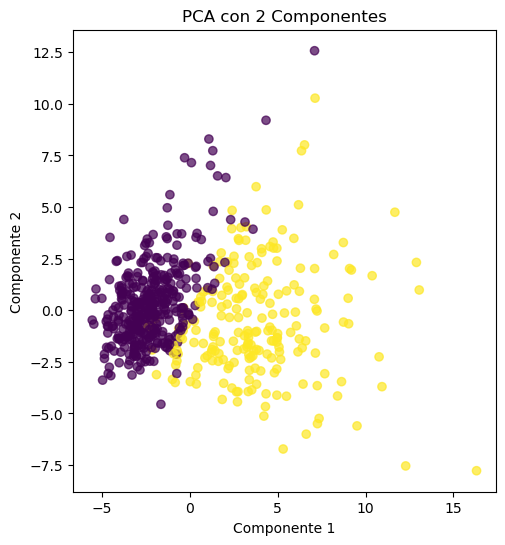

In [12]:
# Gráfico para 2 componentes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(components_2d[:, 0], components_2d[:, 1], c=dot_colors, alpha=0.7)
plt.title("PCA con 2 Componentes")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

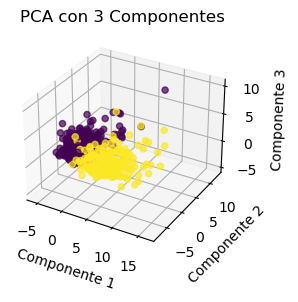

In [13]:
# Gráfico para 3 componentes
ax = plt.subplot(1, 2, 2, projection="3d")
ax.scatter(components_3d[:, 0], components_3d[:, 1], components_3d[:, 2], c=dot_colors, alpha=0.7)
ax.set_title("PCA con 3 Componentes")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
plt.show()

### Cálculo de la varianza explicada

La varianza explicada en el Análisis de Componentes Principales (PCA) se refiere a la proporción de la varianza total de los datos que es capturada o representada por cada componente principal.

Cuando realizas PCA, estás transformando tus datos originales, que pueden tener muchas dimensiones (o características), a un nuevo espacio con menos dimensiones (los componentes principales). Cada componente principal es una combinación lineal de las características originales y capta cierta cantidad de información (o varianza) de los datos.

La varianza explicada por un componente principal te indica qué tan importante es ese componente en términos de cuánta información de los datos originales retiene. Un componente principal que explique, por ejemplo, el 40% de la varianza significa que capta el 40% de la información total que había en todos los datos originales.

In [14]:
# Varianza explicada para 2 y 3 componentes
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

# Cálculo de la varianza explicada acumulada
cumulative_variance_2d = explained_variance_2d.sum()
cumulative_variance_3d = explained_variance_3d.sum()

# Mostrar resultados
print(f"Varianza explicada PCA2: {explained_variance_2d}")
print(f"Varianza acumulada PCA2: {cumulative_variance_2d}")
print(f"Varianza explicada PCA3: {explained_variance_3d}")
print(f"Varianza acumulada PCA3: {cumulative_variance_3d}")

Varianza explicada PCA2: [0.44272026 0.18971182]
Varianza acumulada PCA2: 0.6324320765155944
Varianza explicada PCA3: [0.44272026 0.18971182 0.09393163]
Varianza acumulada PCA3: 0.7263637090331685
